In [1]:
cd ..

/home/g.samarth/starspots


In [3]:
run main.py

Reading FITS: KIC = 003733735; filter = 20d ...


100%|██████████| 500/500 [00:54<00:00,  9.15it/s]


(130, 2)


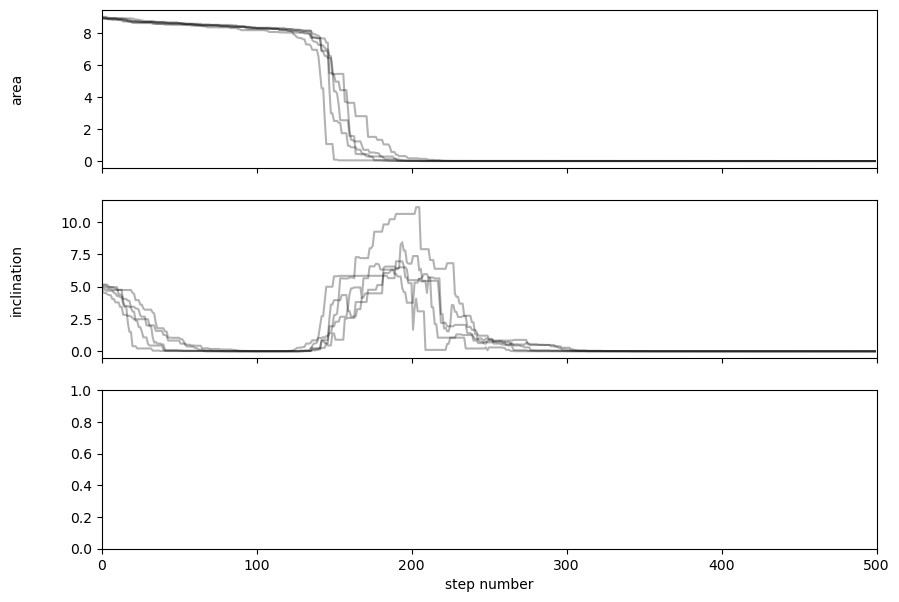

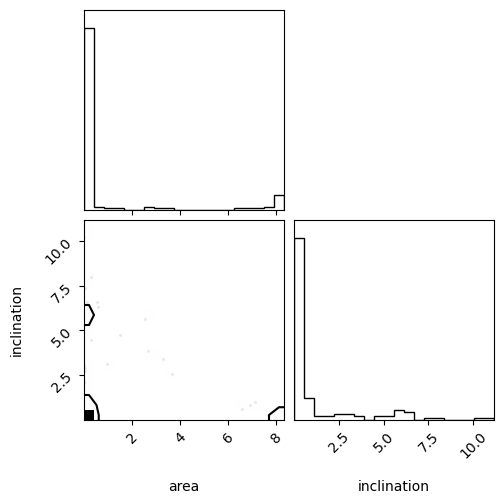

In [4]:
plt.show()

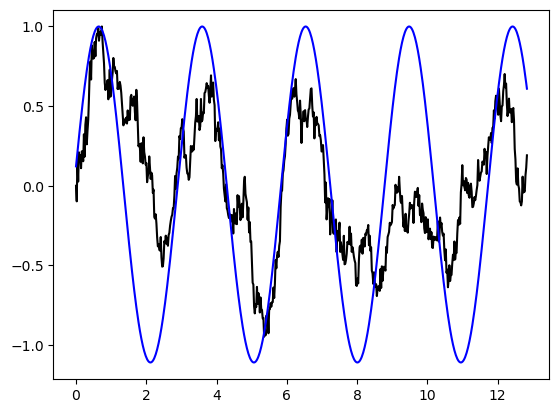

In [49]:
star = ST(inclination=12.5, no_evolution=True, max_area1=3.5e4, Io=abs(lc_data).max(),
  total_time=lc_time[-1]/365.25, time_step=time_step, time_arr=lc_time/365.25, prot=p_rot,
         lon1=np.radians(10.), 
         lon2=np.radians(130.),
          lat1=np.radians(15.),
          lat2=np.radians(125.))
star.simulate_spots()
star.compute_light_curve()
plt.figure()
plt.plot(lc_time, lc_data/lc_data.max(), 'k', label='data')
plt.plot(lc_time, (star.light_curve - star.light_curve.mean()), 'b', label='model')
plt.show()